# Исследование оттока клиентов в банке

**Заказчик**  
Отдел маркетинга "Метанпромбанк" - банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Цель работы**  
В банке резко повысился отток клиентов. Заказчик считает, что возврат старых клиентов потребует меньших затрат, чем привлечение новых, и просит выяснить причины оттока и предложить варианты стратегии по возврату старых клиентов. В частности необходимо:  
- Провести исследовательский анализ данных;  
- Произвести сегментацию пользователей для определения типов клиентов: "отток" и "не отток" - для этого необходимо определить признаки отточности и сравнить портреты клиентов;  
- Отдельно для каждого отточного сегмента необходимо разработать рекомендации по возврату клиентов.

**План работы**  
1. Загрузка и описание данных:  
    1.1. Загрузка библиотек и датасета;  
    1.2. Через заготовленную функцию вывести:  
    - Первые строки датасета - `.head()`;  
    - Информацию о датасете - `.info()`;
    - Описательную статистику - `.describe()`;  
    - Количество явных дубликатов - `.duplicated().sum()`;
    - Гистограммы распределения - `.hist()`;
    1.3. Описать полученные данные, составить план для предобработки;  
2. Подготовка данных - избавление от пропусков, форматирование данных:   
    2.1. В случае несоответствия форматов полей формату вложенных в них данных - изменить их;    
    2.2. Дубликаты:  
        2.2.1. Удалить явные дубликаты, если таковые имеются;    
        2.2.2. Определить и удалить неявные дубликаты в случае их наличия;   
        
    2.3. Пропуски:  
        2.3.1. Установить природу возникновения пропусков;  
        2.3.2. Обработать пропуски, если это возможно. В случае, если пропуски обработать нельзя, а потеря количества строк с ними не повлияет на результаты исследования, то удалить их;    
        
    2.4. Кодирование - в случае применения в дальнейшем корреляционного анализа Пирсона - заменить текстовые значения на числовые;  
3. Исследовательский анализ данных (EDA):  
    3.1. Анализ распределения признаков оттока - поиск признаков, значений и интервалов, склонных к оттоку, для использования их при сегментации:  
    - для непрерывных - поиск отточных интервалов ("отток" больше "не отток");  
    - для категориальных/дискретных - поиск значений признака с оттоком выше, чем в среднем по банку;  
    
    3.2. Анализ портретов клиентов в разрезе оттока - составить таблицу расчета признаков:  
    - для непрерывных - среднее или медиана (последнее в случае выбросов);  
    - для категориальных/дискретных - мода, а также разница между отточными и неотточными; 
    
    3.3. Корреляционный анализ;  
4. Проверка статистических гипотез:  
     4.1. (Обязательная) Доход ушедших клиентов отличается от дохода оставшихся клиентов - в случае различия можно сделать предположение о том, что услуги банка не удовлетворяют запросов клиентов с определенным доходом:  
         4.1.1. Аргументировать выбор теста;  
         4.1.2. Проверить гипотезу;    
         4.1.3. Зафиксировать результат;    
         4.1.4. В случае подтверждения гипотезы вывести доход ушедших клиентов;   
     4.2. (Собственная) Количество продуктов, приобретенных ушедшими клиентами, отличается от количества продуктов неушедших клиентов - в случае отличия можно сделать предположение о том, что определенные пакеты услуг влекут больше затрат или предоставляют меньшие начисления, чем конкуренты:  
         4.2.1. Аргументировать выбор теста;  
         4.2.2. Проверить гипотезу;    
         4.2.3. Зафиксировать результат;    
         4.2.4. В случае подтверждения гипотезы вывести количество продуктов ушедших клиентов;    
     4.3. (Собственная) Баллы кредитного скоринга ушедших клиентов отличаются от баллов кредитного скоринга неушедших клиентов - в случае отличия можно сделать предположение о том, что банк предоставляет для клиентов с определенным кредитным скоррингом большие кредитные ставки по сравнению с конкурентами:  
         4.3.1. Аргументировать выбор теста;  
         4.3.2. Проверить гипотезу;    
         4.3.3. Зафиксировать результат;    
         4.3.4. В случае подтверждения гипотезы вывести кредитный скорринг ушедших клиентов;  
     4.4. Вынести результаты проверки гипотез. В случае подтверждения гипотез отметить группы ушедших клиентов;  
5. Сформировать промежуточные итоги по результатам EDA, корреляционного анализа и гипотез. Выделить признаки, влиящие на отток; 6. Произвести сегментацию клиентов:  
- по двум-трем признакам, например: пол, возраст, наличие кредитной карты;  
- от 500 клиентов на сегмент;
- отток выше среднего уровня по банку;  
- не менее трех сегментов;  
7. Приоритезация сегментов - составить для заказчика рекомендацию по очередности работы с сегментами клиентов;  
8. Формирование рекомендаций - точечные рекомендации в соответствии результатами исследования для определения стратегии работы заказчика.

## Загрузка и описание данных

### Загрузка библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip3 install phik
import phik
from scipy import stats as st

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
def information(dataset):
    display(dataset.head())
    print('*'*50)
    dataset.info()
    print('*'*50)
    display(dataset.describe(percentiles=[0.05, 0.1, 1/4, 0.33, 0.4, 1/2, 0.6, 3/4, 0.9, 0.95, 0.99]).T)
    print('*'*50)
    print('Количество явных дубликатов:', dataset.duplicated().sum())
    print('*'*50)
    dataset.hist(bins = 30, figsize = (20, 10))
    plt.show()

### Обзор данных

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
**************************************************


,count,mean,std,min,5%,10%,25%,33%,40%,50%,60%,75%,90%,95%,99%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,119176.4000,124678.700,142810.25,152382.6700,160158.800,172728.000,183502.400,201261.7500,218022.900,2.236230e+05,2.280191e+05,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,737.0000,765.000,802.00,818.0000,832.000,853.000,873.000,900.0000,928.000,9.460000e+02,9.780000e+02,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,26.0000,29.000,33.00,36.0000,37.000,40.000,44.000,51.0000,61.000,6.500000e+01,7.300000e+01,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.0000,0.000,0.00,1.0000,2.000,3.000,4.000,4.0000,5.000,5.000000e+00,7.000000e+00,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,100104.3200,159201.964,295554.16,361528.6624,419603.476,524272.200,660138.374,980705.8500,1460133.708,2.116705e+06,4.827443e+06,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.0000,1.000,1.00,1.0000,2.000,2.000,2.000,2.0000,3.000,3.000000e+00,4.000000e+00,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.0000,0.000,0.00,1.0000,1.000,1.000,1.000,1.0000,1.000,1.000000e+00,1.000000e+00,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.0000,0.000,0.00,0.0000,0.000,1.000,1.000,1.0000,1.000,1.000000e+00,1.000000e+00,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,32163.9715,45471.903,75251.90,89317.8430,101310.156,119658.105,139362.598,174500.5425,242395.782,3.168853e+05,8.879039e+05,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000,0.000,0.0000,1.000,1.000000e+00,1.000000e+00,1.000000e+00


**************************************************
Количество явных дубликатов: 0
**************************************************


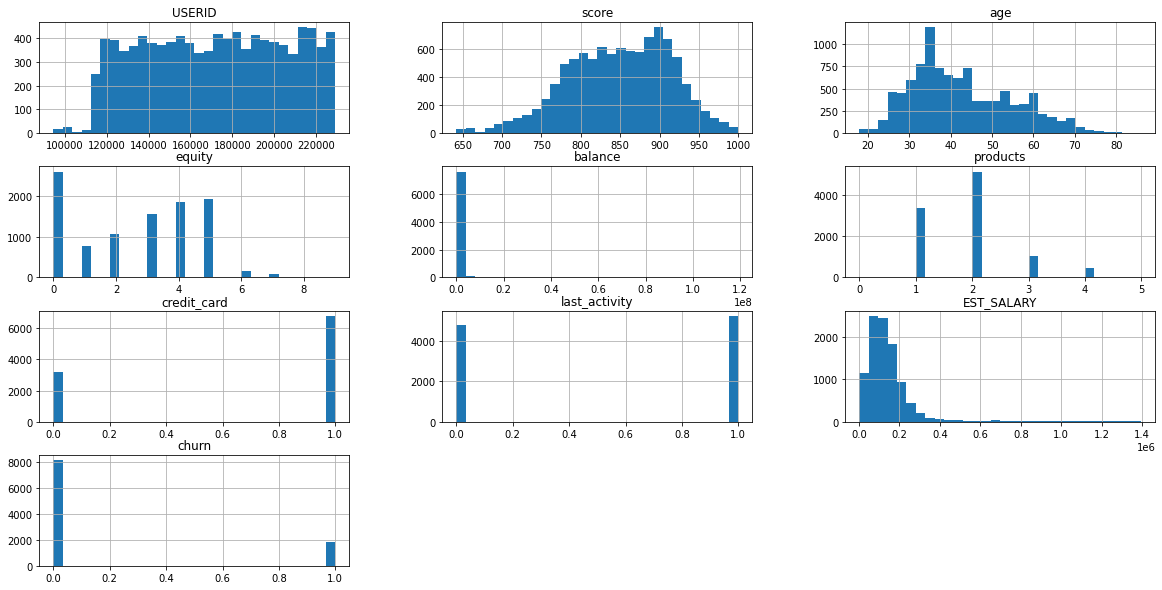

In [4]:
information(data)

### Описание данных

**Входные данные**
- `USERID` - уникальный индентификатор пользователя;  
- `score` - баллы кредитного скоринга;  
- `city` - город;  
- `gender` - пол;  
- `age` - возраст;  
- `equity` - количество баллов собственности;  
- `balance` - баланс на счете;  
- `products` - количество продуктов, которыми пользуется клиент;  
- `credit_card` - наличие кредитной карты;  
- `last_activity` - активный клиент;  
- `EST_SALARY` - оценочный доход клиента;  
- `churn` - признак оттока.

Столбцы `USERID` и `EST_SALARY` необходимо привести к snake_case.

В полях `age` и `balance` присутствуют неопределенные значения - в дальнейшем необходимо изучить природу их возникновения и обработать при возможности.

**Распределение данных**  
 - `score`: минимальный скоринг составляет 642 балла, в основном балл кредитного скоринга находится между 802 и 900. Медиана - 853, среднее 849, а средний разброс - 65. В основном клинты имеют скоринг в последней четверти;
 - `age`: минимальный возраст - 18 лет. В основном аудиторию банка представляют клиенты возрастом от 33 до 51 года. Медиана - 40 лет;  
 - `equity`: в основном у клиентов от 0 до 4 баллов собственности;
 - `balance`: минимальный баланс клиентов - 0 - при этом уже на 5% квартиле баланс составляет свыше 100 тыс. рублей. В основном у пользователей на балансе от 295 тыс. до 980 тыс. рублей;  
 - `products`: в основном у клиентов от 1 до 2 продуктов;  
 - `EST_SALARY`: ожидаемые доход клиентов в месяц от 75 тыс. до 174 тыс. рублей;

**План предобработки**  
1. Изменить названия столбцов `USERID` и `EST_SALARY` в соответствии со snake_case;
2. Изучить природу пропусков в полях `age` и `balance` и обработать их при возможности;  

## Предобработка данных

In [5]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### snake_case

In [6]:
df = df.rename(columns = {'USERID':'user_id',
                                 'EST_SALARY':'est_salary'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Пропуски

In [7]:
def null_in_data(dataset, #исходный датасет
                null_columns, #условие присвоения параметра - либо по одному полю, либо по двум сразу
                ):
    df_null = dataset.copy() #чтобы в исходном датасете не было столбца с признаком, формируем новый
    df_null['null'] = null_columns #
    pivot_by_null = {
                    'Без пропусков':
                        [
                            df_null['age'].mean(), #среднее по возрасту
                            df_null['est_salary'].mean(), #среднее по зарплате
                            df_null['equity'].median(), #медиана по собственности
                            df_null['products'].median(), #медина по продуктам
                            df_null['city'].mode().loc[0], #мода по городам
                            df_null['gender'].mode().loc[0] #мода по полу
                        ],
                    
                    'С пропусками': #не игнорируем пропуски на основе столбца с маркером пропуска,
                                    #т.е. считать, если в столбце 'null' указано или True, или False
                        [
                            df_null[df_null['null'] == (True | False)]['age'].mean(), 
                            df_null[df_null['null'] == (True | False)]['est_salary'].mean(),
                            df_null[df_null['null'] == (True | False)]['equity'].median(),
                            df_null[df_null['null'] == (True | False)]['products'].median(),
                            df_null[df_null['null'] == (True | False)]['city'].mode().loc[0],
                            df_null[df_null['null'] == (True | False)]['gender'].mode().loc[0]],
        
                    'Относительная разница': #доля разницы 'с пропусками' и 'без пропусков' от 'без пропусков'
                        [
                            ((df_null['age'].mean() -
                             df_null[df_null['null'] == (True | False)]['age'].mean())) / df_null['age'].mean(),
                            ((df_null['est_salary'].mean() -
                             df_null[df_null['null'] == (True | False)]['est_salary'].mean()) / df_null['est_salary'].mean()),
                            ((df_null['equity'].median() -
                             df_null[df_null['null'] == (True | False)]['equity'].median()) / df_null['equity'].median()),
                            ((df_null['products'].median() -
                             df_null[df_null['null'] == (True | False)]['products'].median()) / df_null['products'].median()),
                            '-',
                            '-'
                        ]
                    }
    pivot_by_null = pd.DataFrame(pivot_by_null, index = ['Средний возраст',
                                                 'Средняя зарплата',
                                                 'Медианное количество собственности',
                                                 'Медианное количество продуктов',
                                                 'Мода по городу',
                                                 'Мода по полу'])
    display(pivot_by_null)

In [8]:
null_in_data(df, df['age'].isnull() | df['balance'].isnull())

,Без пропусков,С пропусками,Относительная разница
Средний возраст,42.734409,42.093023,0.015009
Средняя зарплата,147866.885544,225806.69049,-0.527094
Медианное количество собственности,3.0,0.0,1.0
Медианное количество продуктов,2.0,1.0,0.5
Мода по городу,Ярославль,Ярославль,-
Мода по полу,М,М,-


In [9]:
print('Пропуски по `age`:', df['age'].isnull().sum() / len(df))
print('Пропуски по `balance`:', df['balance'].isnull().sum() / len(df))

Пропуски по `age`: 0.0026
Пропуски по `balance`: 0.2295


Пропуски по `age` минимальны - потеря этих строк не внесет существенных изменений в дальнейший анализ, однако потеря строк по полю `balance` существенно повысит погрешность. Строки с пропусками не имеют существенного влияния на средний возраст, моду по городу и полу, однако потеря строк с этими пропусками приведет к существенным изменениям в полях с зарплатой, количеством продуктов и баллами собственности.

In [10]:
df = df[df['age'].notnull()]
print('Осталось от исходного датасета:',len(df) / len(data))

Осталось от исходного датасета: 0.9974


Вполне вероятно, что возникновение пропусков может быть связано с ошибкой в отделениях банков. Рассмотрим данную версию.

In [11]:
#сводная таблица подсчета пропусков по городам
pt = (
    (
        df[df['balance'].isnull()] #поля баланса с пропущенным значением
        .pivot_table(index = 'city', values = 'user_id', aggfunc = 'count') #сводная таблица по городам с подсчетом по id
        .reset_index().rename(columns = {'user_id':'null_by_city'}) 
    )
    .merge(
        (
            df.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count') #сводная таблица с подсчетом всех клиентов
            .reset_index().rename(columns = {'user_id':'all'})), on = 'city' #соединить по полю с городом
    )
)
pt['null_to_all'] = pt['null_by_city'] / pt['all'].sum() #доля пропусков от клиентов в городе
pt

,city,null_by_city,all,null_to_all
0,Ростов,235,1416,0.023561
1,Рыбинск,586,2683,0.058753
2,Ярославль,1458,5875,0.146180


Text(0.5, 1.0, 'Аппроксимация пропусков к количеству клиентов в городе')

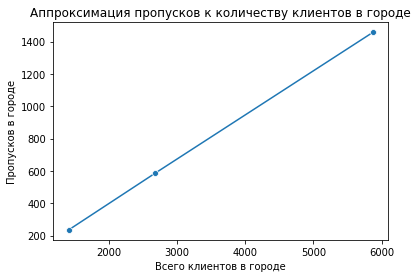

In [12]:
sns.lineplot(data = pt, x = 'all', y ='null_by_city', marker = 'o')
plt.xlabel('Всего клиентов в городе')
plt.ylabel('Пропусков в городе')
plt.title('Аппроксимация пропусков к количеству клиентов в городе')

Происхождение пропусков в данных имеет линейную зависимость - значит ошибка системная

In [13]:
if (1 - len(df)/len(data)) < 0.05:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это удовлетворительно')
else:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это неудовлетворительно')

Потери составили: 0.26% - это удовлетворительно


### Дубликаты

Ранее установлено, что явных дубликатов нет. Исследуем неявные дубликаты по столбцу `user_id`

In [14]:
print('Неявных дубликатов:', df.duplicated(subset = 'user_id').sum())
display(df[df.duplicated(subset = 'user_id')].sort_values('user_id'))

Неявных дубликатов: 50


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
5420,126368,832.0,Рыбинск,Ж,33.0,0,NaN,1,0,0,118465.34,0
9504,129785,949.0,Ярославль,М,43.0,0,NaN,1,1,1,166845.37,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
7487,140377,930.0,Рыбинск,Ж,34.0,5,1123967.02,1,1,1,148336.26,0
5569,141265,811.0,Рыбинск,Ж,33.0,3,1044316.88,2,1,0,46055.32,0


Часть дубликатов имеет пропуски по полю `balance`. Проверим, есть ли дубликаты по обоим полям

In [15]:
df[df.duplicated(subset = ['user_id', 'balance'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Дубликатов по обоим полям нет - значит их удаление не должно деформировать картину.

Избавимся от неявных дубликатов

In [16]:
df.drop_duplicates(subset = ['user_id'], inplace = True)
print('Неявных дубликатов:', df.duplicated(subset = 'user_id').sum())
print('Осталось от исходного датасета:',len(df) / len(data))
if (1 - len(df)/len(data)) < 0.05:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это удовлетворительно')
else:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это неудовлетворительно')

Неявных дубликатов: 0
Осталось от исходного датасета: 0.9924
Потери составили: 0.76% - это удовлетворительно


### Ограничение

Как видно из распределения по `balance` и `est_salary`, данные распределены неравномерно

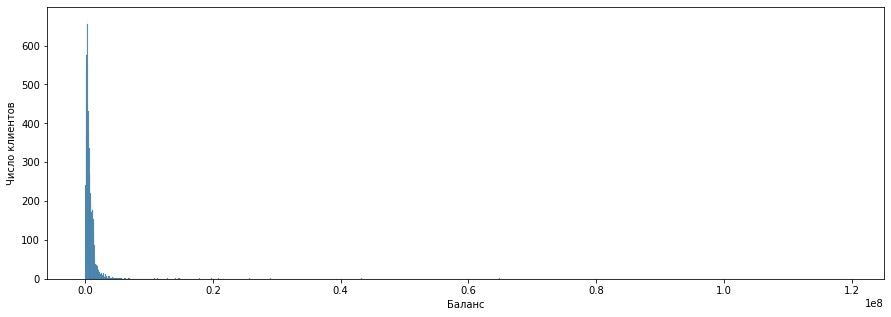

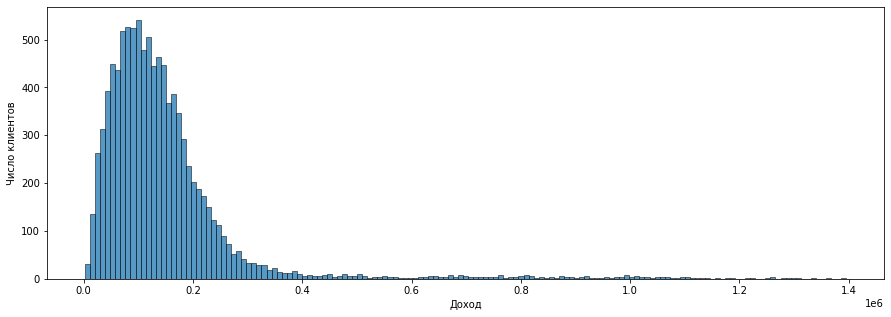

In [17]:
fig, ax = plt.subplots(figsize = (15, 5))   
sns.histplot(df['balance'])
plt.xlabel('Баланс')
plt.ylabel('Число клиентов')
plt.legend
plt.title('')
plt.show()

fig, ax = plt.subplots(figsize = (15, 5))   
sns.histplot(df['est_salary'])
plt.xlabel('Доход')
plt.ylabel('Число клиентов')
plt.legend
plt.title('')
plt.show()

#### Баланс

Рассмотри меньший масштаб по полю `balance`

In [18]:
border_balance = 0.2*(10**8)
print(f'Потеря данных при пределе, равном {border_balance}, составит:', len(df[df['balance'] > border_balance])/len(data))
loss_balance = round(1 - df[df['balance'] < border_balance]['balance'].sum()/df['balance'].sum(), 2)
if loss_balance <= 0.05:
    print(f'Если удалить записи, чей баланс выше {border_balance}, то потери от баланса составят: {loss_balance} - удовлетворительно')
else:
    print(f'Если удалить записи, чей баланс выше {border_balance}, то потери от баланса составят: {loss_balance} - слишком критичные потери')


Потеря данных при пределе, равном 20000000.0, составит: 0.0007
Если удалить записи, чей баланс выше 20000000.0, то потери от баланса составят: 0.05 - удовлетворительно


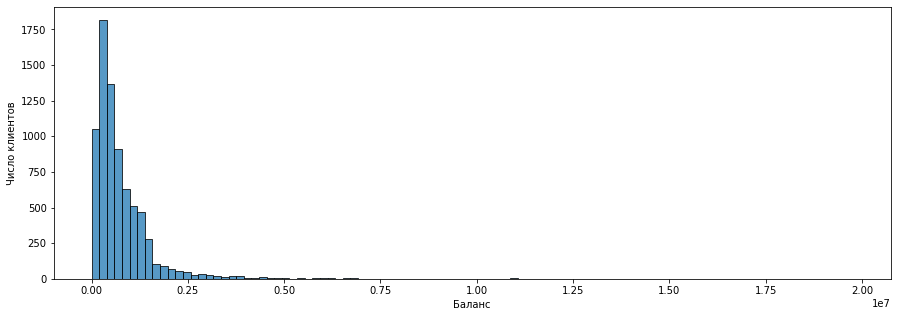

In [19]:
fig, ax = plt.subplots(figsize = (15, 5))   
sns.histplot(df[df['balance'] < border_balance]['balance'], bins = 100)
plt.xlabel('Баланс')
plt.ylabel('Число клиентов')
plt.legend
plt.title('')
plt.show()

#### Доход

In [20]:
border_salary = 1*(10**6)
print(f'Потеря данных при пределе, равном {border_salary}, составит:', len(df[df['est_salary'] > border_salary])/len(data))

loss_salary = round(1 - df[df['est_salary'] < border_salary]['est_salary'].sum()/df['est_salary'].sum(), 2)
if loss_salary <= 0.05:
    print(f'Если удалить записи, чей баланс выше {border_salary}, то потери от баланса составят: {loss_salary} - удовлетворительно')
else:
    print(f'Если удалить записи, чей баланс выше {border_salary}, то потери от баланса составят: {loss_salary} - слишком критичные потери')


Потеря данных при пределе, равном 1000000, составит: 0.0059
Если удалить записи, чей баланс выше 1000000, то потери от баланса составят: 0.05 - удовлетворительно


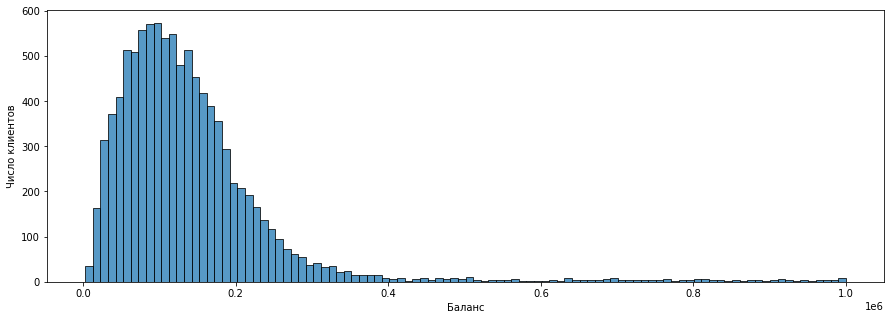

In [21]:
fig, ax = plt.subplots(figsize = (15, 5))   
sns.histplot(df[df['est_salary'] < border_salary]['est_salary'], bins = 100)
plt.xlabel('Баланс')
plt.ylabel('Число клиентов')
plt.legend
plt.title('')
plt.show()

In [22]:
df = df.query('(balance.isnull()) | (balance < = @border_balance)')

In [23]:
df = df.query('(est_salary.isnull()) | (est_salary < = @border_salary)')

In [24]:
print('Осталось от исходного датасета:',len(df) / len(data))
if (1 - len(df)/len(data)) < 0.05:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это удовлетворительно')
else:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это неудовлетворительно')

Осталось от исходного датасета: 0.9859
Потери составили: 1.41% - это удовлетворительно


### Аномалии

В поле, обазначающем количество продуктов замечено, что присутствуют записи с количеством продуктов, равном 0

In [25]:
len(df[df['products'] == 0])

1

In [26]:
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


У клиента высокий кредитный рейтинг и 3 объекта собственности, отсутствует информация о балансе, он является отточным, а его возраст - 79. Возможно, клиент является погибшим, ввиду большого возраста, но его еще не удалили из БД. В любом случае, эту запись следует удалить.

In [27]:
df = df[df['products'] != 0]

In [28]:
print('Осталось от исходного датасета:',len(df) / len(data))
if (1 - len(df)/len(data)) < 0.05:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это удовлетворительно')
else:
    print(f'Потери составили: {round((1 - len(df)/len(data))*100, 4)}% - это неудовлетворительно')

Осталось от исходного датасета: 0.9858
Потери составили: 1.42% - это удовлетворительно


### Вывод

В исходном датасете замечены и, по возможности исправлены:  
- Названия полей с id и доходом не приведены к snake_case;  
- Обнаружены пропуски в полях `age` (менее 1%) и `balance` (22% от всего датасета). Установлено, что пропуски по полю `balance` имеют линейную зависимость от количества клиентов, что говорит о том, что ошибка является систематической и вызвана техническим сбоем;  
- Были обнаружены неявные дубликаты - ввиду малочисленности, они были удалены;  
- Для удобства анализа был уменьшен диапазон исследования в полях `balance` и `est_salary`, так как большие значения в этих полях деформируют анализ основной группы клиентов;  
- Также обнаружен клиент, у которого количество продуктов составляет 0, он сам присоединен к группе "отток". Так как его возраст 79 лет, то следует проверить, является присутствие записи в БД оправданным. user_id: 147837

В конечном счете, из 10000 исходных записей осталось 9858 - потери данных составили 1.42%

## Исследовательский анализ данных

### Анализ распределения признаков оттока

In [33]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Всего представлено 10 признаков, по которым можно отслеживать отток:
- `score`;
- `city`;
- `gender`;
- `age`;
- `equity`;
- `balance`;
- `products`;
- `credit_card`;
- `last_activity`;
- `est_salary`

In [34]:
#построение графиков сравнения "отток" и "не отток" для непрерывных признаков
#dataset - df, указывается отдельно, чтобы можно были применить функцию к другим датасетам;
#column - признак, по которому строится сравнение;
#sign - название признака;
#title_subplot - заголовок распределения по признаку группы;
#title_box - заголовок разброса по признаку группы
def distrib(dataset, column, sign, title_hist, title_box):
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.set_palette(['tab:blue', 'tab:red', 'tab:green'])
    
    #гистограмма
    sns.histplot(data = dataset,
                 x = column,
                 hue = 'churn',
                 stat = 'density',
                 common_norm = False,
                 ax = plt.subplot(1, 2, 1))
    plt.xlabel(sign)
    plt.ylabel('Число клиентов')
    plt.title(title_hist)
    
    #ящик с усами
    sns.boxplot(data = dataset,
                x = 'churn',
                y = column,
                ax = plt.subplot(1, 2, 2))
    plt.xlabel('Группы по оттоку')
    plt.ylabel(sign)
    plt.title(title_box)
    
    
    fig.suptitle(sign)
    plt.show()

In [35]:
#функция для детального рассмотрения отточности непрерывных признаков
def distrib_segm(dataset, column, sign, title, bins_c, param_min, param_max):
    sns.set_palette(['tab:blue', 'tab:red'])
    plt.figure(figsize = (15,5))
    sns.histplot(data = dataset[(dataset[column] >= param_min) &  (dataset[column] <= param_max)], x = column, hue = 'churn', bins = bins_c, stat = 'density', common_norm = False)
    plt.xlabel(sign)
    plt.ylabel('Плотность распределения')
    plt.title(title)
    plt.show()

In [36]:
#построение графиков для категориальных признаков
#dataset - df, указывается отдельно, чтобы можно были применить функцию к другим датасетам;
#column - признак, по которому строится сравнение;
#sign - название признака группы;
#title_subplot - заголовок распределения по признаку группы;
#title_box - заголовок разброса по признаку группы
def category(dataset, column, sign, title_subplot):
    sns.set_palette(['tab:blue', 'tab:red','tab:green'])
    
    #столбчатая диаграмма
    sns.barplot(data = dataset,
                x = column,
                y = 'churn', color = 'tab:blue') #распределение ушедших клиентов по параметру
    plt.axhline(dataset['churn'].mean(), color = 'black', linestyle = '--') #линия по среднему
    plt.xlabel(sign)
    plt.ylabel('Число клиентов')
    plt.title(title_subplot)
    
    plt.show()    

In [37]:
distrib_list = pd.DataFrame({'column': ['score',
                                        'age',
                                        'balance',
                                        'est_salary'],
                             'sign': ['Кредитный скоринг',
                                      'Возраст',
                                      'Баланс на счете',
                                      'Оценочный доход'],
                             'title_hist': ['Распределение кредитного скоринга',
                                            'Распределение клиентов по возрасту',
                                            'Распределение клиентов по балансу на счете',
                                            'Распределение клиентов по доходу'],
                             'title_box': ['Разброс кредитного скоринга',
                                           'Разброс возраста',
                                           'Разброс баланса',
                                           'Разброс дохода']
                            })

category_list = pd.DataFrame({'column': ['equity',
                                         'products',
                                         'city',
                                         'gender',
                                         'credit_card',
                                         'last_activity',],
                              'sign': ['Количество объектов собственности',
                                       'Количество продуктов',
                                       'Город',
                                       'Пол',
                                       'Кредитная карта',
                                       'Активность'],
                              'title_subplot': ['Распределение по количеству объектов собственности', 
                                                'Распределение по количеству продуктов',
                                                'Распределение по городам',
                                                'Распределение по полу',
                                                'Распределение по наличию кредитной карты',
                                                'Распределение по последней активности']
                             })

#### Количественные признаки

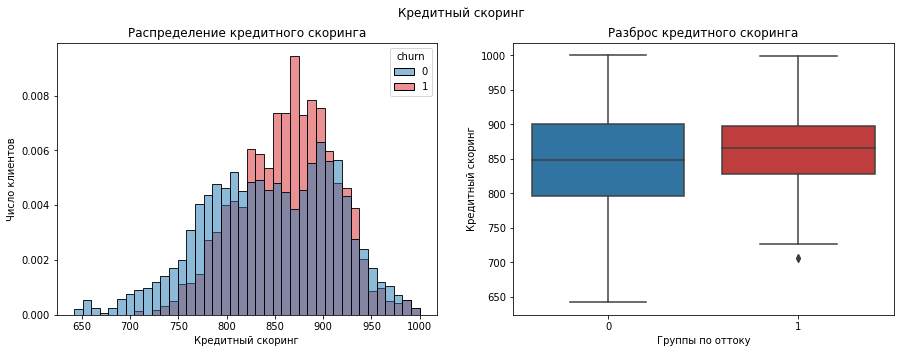

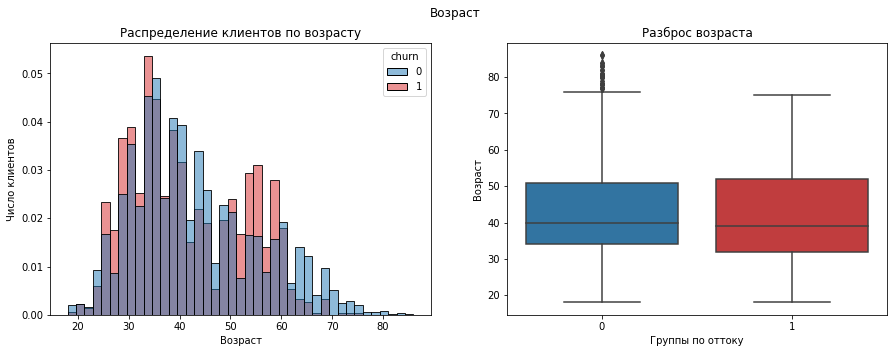

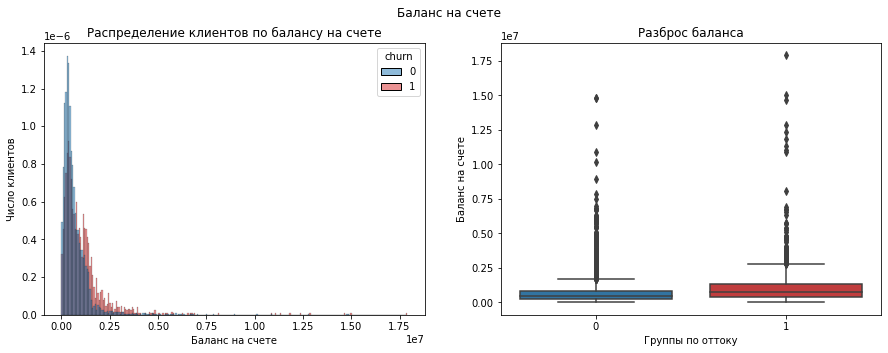

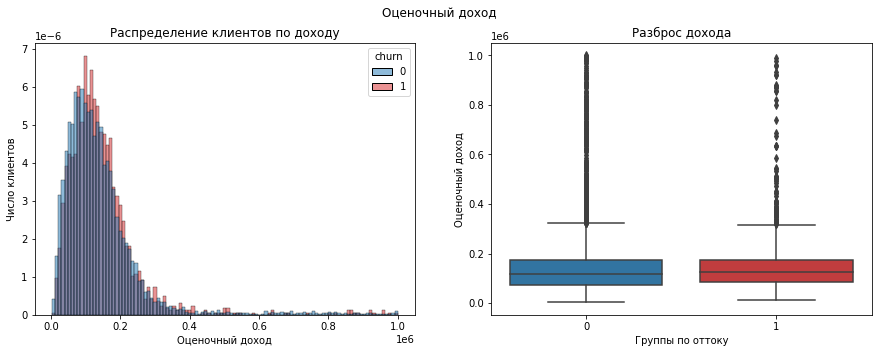

In [38]:
for i, row in distrib_list.iterrows():
    distrib(df, row[0], row[1], row[2], row[3])

##### Кредитный скоринг

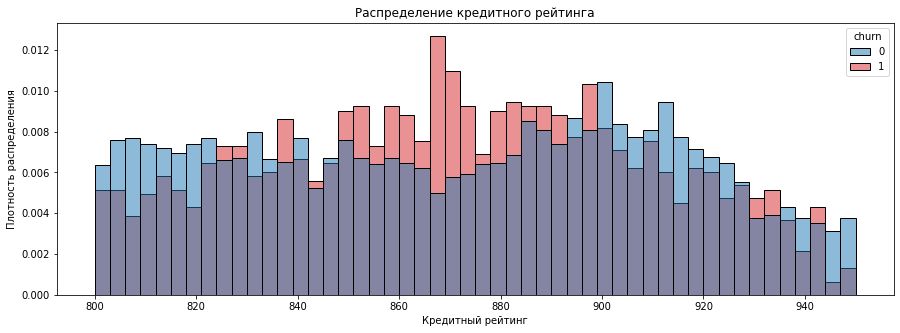

In [40]:
distrib_segm(df, 'score', 'Кредитный рейтинг', 'Распределение кредитного рейтинга', 50, 800, 950)

Наибольший отток наблюдается у клиентов с рейтингом от 840 до 900

In [41]:
#сохранение переменных для дальнейшей сегментации
score_segm_min = 840
score_segm_max = 900

##### Возраст

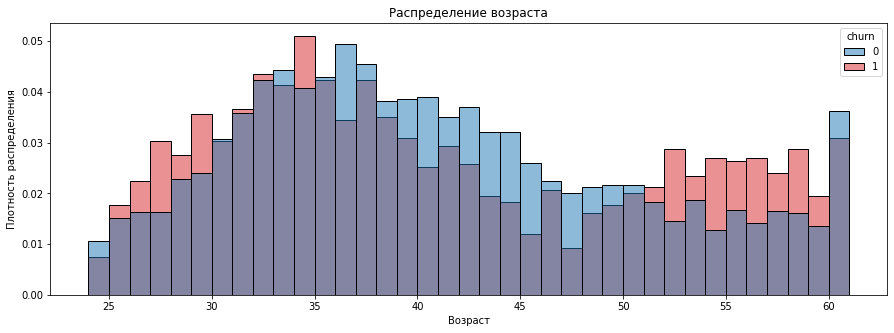

In [42]:
distrib_segm(df, 'age', 'Возраст', 'Распределение возраста', 37, 24, 61)

Отточный возраст: 25-35 и 50-60

In [43]:
age_segm_min1 = 25
age_segm_max1 = 35
age_segm_min2 = 52
age_segm_max2 = 60

##### Баланс

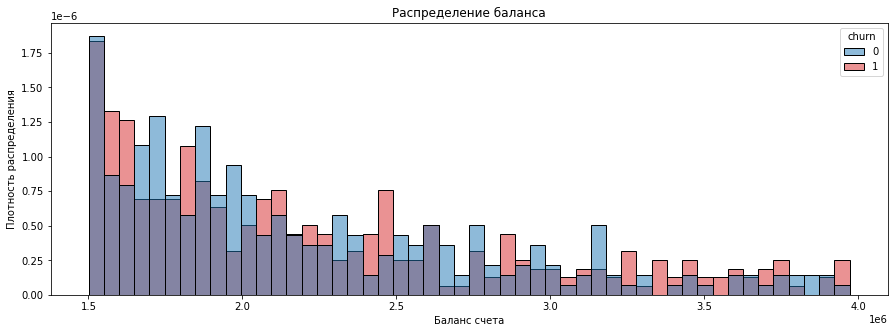

In [44]:
distrib_segm(df, 'balance', 'Баланс счета', 'Распределение баланса', 50, 1500000, 4000000)

Отток наблюдается на промежутках:
- 1.5 млн. руб. - 1.65 млн. руб;  
- 1.75 млн. руб - 1.85 млн. руб;
- 2.05 млн. руб - 2.3 млн. руб;  
- 2.4 млн. руб - 2.5 млн. руб;
- 2.85 млн. руб - 2.95 млн. руб;  
- более 3 млн. руб.

Такие суммы являются крупными относительно баланса остально клиентуры - это может означать, что условия для вкладов не удовлетворяют потребностям клиентов, по сравнению с конкурентами

In [45]:
balance_segm_min = 1.5*(10**6)
balance_segm_max = 4000000

##### Доход клиентов

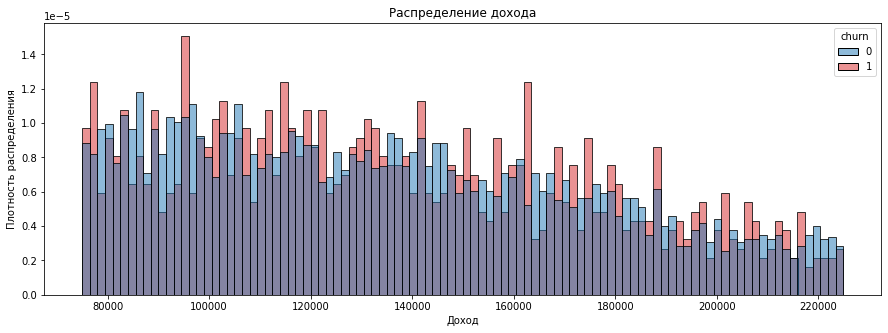

In [46]:
distrib_segm(df, 'est_salary', 'Доход', 'Распределение дохода', 100, 75000, 225000)

Распределение неравномерно, однако на данном интервале наблюдается наибольшее преобладание отточных клиентов: от 75 тыс. рублей до 220 тыс. рублей

In [47]:
salary_segm_min = 75000
salary_segm_max = 220000

#### Категориальные признаки

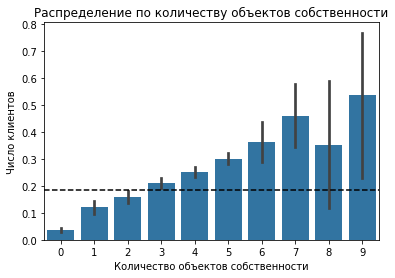

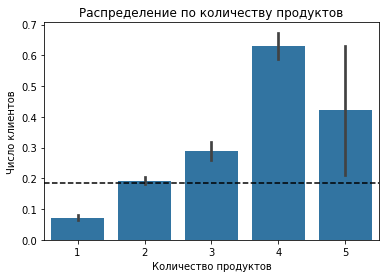

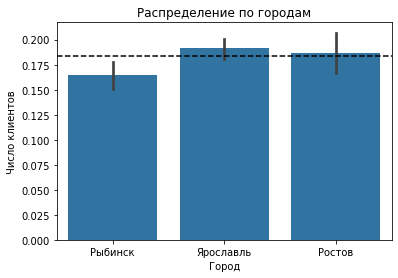

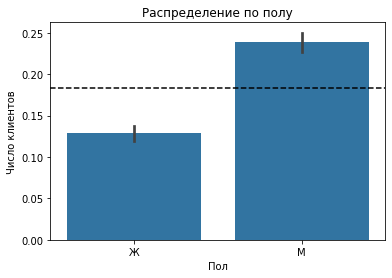

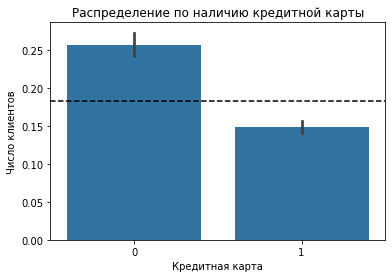

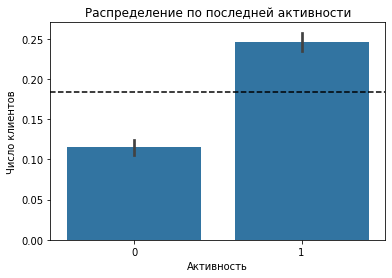

In [48]:
for i, row in category_list.iterrows():
    category(df, row[0], row[1], row[2])

##### Количество объектов собственности

От 3х и более объектов собственности начинается отток клиентов

In [49]:
equity_segm = 3

##### Количество продуктов

От 2х и более продуктов начинается отток клиентов

In [50]:
prod_segm = 2

##### Город, пол, кредитная карта, активность

Отток клиентов наблюдается при следующих параметрах:
- Город: Ярославль/Ростов;  
- Пол: Мужской;  
- Кредитная карта: нет;  
- Активность в последнее время: да.

##### Объединение признаков в единые фреймы

In [51]:
#датафрейм, в который вносятся параметры
distrib_list = {'form': ['Скоринг',
                         'Возраст1', 
                         'Возраст2',
                         'Баланс', 
                         'Собственность',
                         'Продукты',
                         'Доход'],
                'parameter': ['score',
                            'age', 
                            'age',
                            'balance', 
                            'equity',
                            'products',
                            'est_salary'],
                'min':
                [
                    score_segm_min,
                    age_segm_min1,
                    age_segm_min2,
                    balance_segm_min,
                    equity_segm,
                    prod_segm,
                    salary_segm_min],
                'max':
                [
                    score_segm_max,
                    age_segm_max1,
                    age_segm_max2,
                    balance_segm_max,
                    df['equity'].max(),
                    df['products'].max(),
                    salary_segm_max], 
                'churn_count':[df[(df['score']>= score_segm_min) & (df['score']<= score_segm_max)]['churn'].sum(),
                              df[(df['age'] >= age_segm_min1) & (df['age'] <= age_segm_max1)]['churn'].sum(),
                              df[(df['age'] >= age_segm_min2) & (df['age'] <= age_segm_max2)]['churn'].sum(),
                              df[(df['balance'] >= balance_segm_min) & (df['balance'] <= balance_segm_max)]['churn'].sum(),
                              df[(df['equity'] >= equity_segm) & (df['equity'] <= df['equity'].max())]['churn'].sum(),
                              df[(df['products'] >= prod_segm) & (df['products'] <= df['products'].max())]['churn'].sum(),
                              df[(df['est_salary'] >= salary_segm_min) & (df['est_salary'] <= salary_segm_max)]['churn'].sum()
                             ],
                'count_all':[df[(df['score']>= score_segm_min) & (df['score']<= score_segm_max)]['churn'].count(),
                              df[(df['age'] >= age_segm_min1) & (df['age'] <= age_segm_max1)]['churn'].count(),
                              df[(df['age'] >= age_segm_min2) & (df['age'] <= age_segm_max2)]['churn'].count(),
                              df[(df['balance'] >= balance_segm_min) & (df['balance'] <= balance_segm_max)]['churn'].count(),
                              df[(df['equity'] >= equity_segm) & (df['equity'] <= df['equity'].max())]['churn'].count(),
                              df[(df['products'] >= prod_segm) & (df['products'] <= df['products'].max())]['churn'].count(),
                              df[(df['est_salary'] >= salary_segm_min) & (df['est_salary'] <= salary_segm_max)]['churn'].count()
                             ]
               }

distrib_list = pd.DataFrame(distrib_list)
distrib_list

,form,parameter,min,max,churn_count,count_all
0,Скоринг,score,840.0,900,820,3182
1,Возраст1,age,25.0,35,661,3015
2,Возраст2,age,52.0,60,393,1395
3,Баланс,balance,1500000.0,4000000,320,601
4,Собственность,equity,3.0,9,1462,5527
5,Продукты,products,2.0,5,1577,6584
6,Доход,est_salary,75000.0,220000,1225,6118


In [52]:
category_list = {'parameter': ['city',
                             'city',
                             'gender',
                             'credit_card',
                             'last_activity'],
                 'value':['Ярославль',
                          'Ростов',
                          'М',
                          0,
                          1],
                 'churn_count':[df[df['city'] == 'Ярославль']['churn'].sum(), 
                           df[df['city'] == 'Ростов']['churn'].sum(),
                           df[df['gender'] == 'М']['churn'].sum(),
                           df[df['credit_card'] == 0]['churn'].sum(),
                           df[df['last_activity'] == 1]['churn'].sum()], 
                 'count_all': [df[df['city'] == 'Ярославль']['user_id'].count(), 
                           df[df['city'] == 'Ростов']['user_id'].count(),
                           df[df['gender'] == 'М']['user_id'].count(),
                           df[df['credit_card'] == 0]['user_id'].count(),
                           df[df['last_activity'] == 1]['user_id'].count()]}

category_list = pd.DataFrame(category_list, index = ['Город1',
                                                   'Город2', 
                                                   'Пол',
                                                   'Кредитная карта', 
                                                   'Активность'])
category_list

,parameter,value,churn_count,count_all
Город1,city,Ярославль,1109,5789
Город2,city,Ростов,265,1416
Пол,gender,М,1176,4928
Кредитная карта,credit_card,0,813,3161
Активность,last_activity,1,1270,5162


In [53]:
distrib_list

,form,parameter,min,max,churn_count,count_all
0,Скоринг,score,840.0,900,820,3182
1,Возраст1,age,25.0,35,661,3015
2,Возраст2,age,52.0,60,393,1395
3,Баланс,balance,1500000.0,4000000,320,601
4,Собственность,equity,3.0,9,1462,5527
5,Продукты,products,2.0,5,1577,6584
6,Доход,est_salary,75000.0,220000,1225,6118


**Непрерывные признаки**
1. Клиенты с кредитным рейтингом от 840 до 900 склонны к оттоку;
2. Клиенты 25-35 лет и 52-60 наиболее склонны к оттоку;  
3. Клиенты, имеющие на балансе в банке более 1.5 млн. рублей наиболее склонны к оттоку;
4. Клиенты, чей доход составляет от 75 тыс. до 220 тыс. рублей, наиболее склонны к оттоку.

**Дискретные признаки**  
1. Клиенты, имеющие более 2 и более продукта банка, наиболее склонны к оттоку;  
2. Клиенты, имеющие 3 и более объекта собственности, наиболее склонны к оттоку;
3. Клиенты из Ростова и Ярославля склонны к оттоку;  
4. Мужчины склонны к оттоку;  
5. Клиенты без кредитной карты склонны к оттоку;  
6. Активные клиенты склонны к оттоку.

### Корреляция

In [54]:
list_col = list(df.loc[:,df.columns != 'user_id'])
list_col

['score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn']

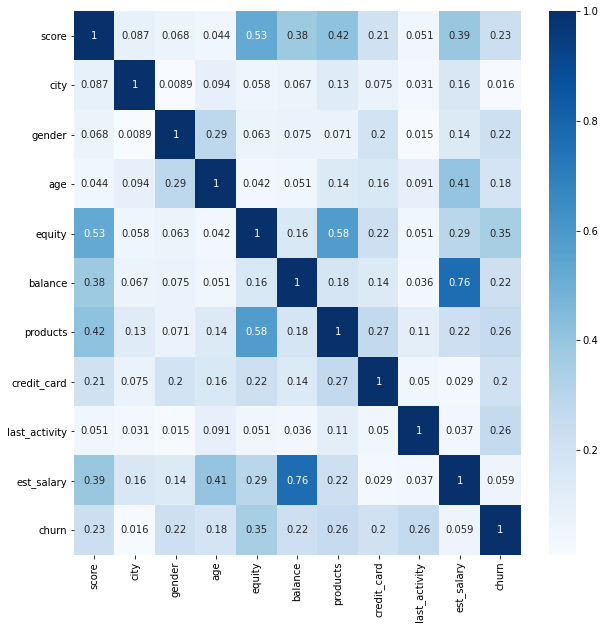

In [55]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df
            .loc[:,df.columns != 'user_id']
            .phik_matrix(interval_cols = ['score',
                                          'age',
                                          'balance',
                                          'est_salary'],),
            annot = True,
            ax = ax,
           cmap = 'Blues')

plt.show()

Обнаружены корреляции - это может говорить о возможном наличии линейной корреляции  
Сильная корреляция:  
- Ожидаемый доход и баланс;

Средняя корреляция:
 - Количество собственности и кредитный скоринг;  
 - Баланс и кредитный скоринг;  
 - Количество продуктов и кредитный скоринг;
 - Доход и кредитный скоринг;  
 - Возраст и доход;  
 - Количество собственности и количество продуктов.

### Анализ портретов клиентов

Ранее были установлены наиболее отточные значения признаков. Рассмотрим значения подробнее:

In [56]:
def churn_in_data(dataset):
    pivot_by_churn = {
                    'Не отток':
                        [
                            dataset[dataset['churn'] == 0]['score'].mean(), #средний скоринг
                            dataset[dataset['churn'] == 0]['age'].mean(), #среднее по возрасту
                            dataset[dataset['churn'] == 0]['balance'].mean(), #среднее по балансу
                            dataset[dataset['churn'] == 0]['est_salary'].mean(), #среднее по зарплате
                            dataset[dataset['churn'] == 0]['equity'].median(), #медиана по собственности
                            dataset[dataset['churn'] == 0]['products'].median(), #медина по продуктам
                            dataset[dataset['churn'] == 0]['city'].mode().loc[0], #мода по городам
                            dataset[dataset['churn'] == 0]['gender'].mode().loc[0], #мода по полу
                            dataset[dataset['churn'] == 0]['credit_card'].mode().loc[0], #мода по наличию кредитной карты
                            dataset[dataset['churn'] == 0]['last_activity'].mode().loc[0] #мода по последней активности
                        ],
                    
                    'Отток': 
                        [
                            dataset[dataset['churn'] == 1]['score'].mean(),
                            dataset[dataset['churn'] == 1]['age'].mean(), 
                            dataset[dataset['churn'] == 1]['balance'].mean(),                           
                            dataset[dataset['churn'] == 1]['est_salary'].mean(),
                            dataset[dataset['churn'] == 1]['equity'].median(),
                            dataset[dataset['churn'] == 1]['products'].median(),
                            dataset[dataset['churn'] == 1]['city'].mode().loc[0],
                            dataset[dataset['churn'] == 1]['gender'].mode().loc[0],
                            dataset[dataset['churn'] == 1]['credit_card'].mode().loc[0],
                            dataset[dataset['churn'] == 1]['last_activity'].mode().loc[0]],
        
                    'Относительная разница (%)': 
                        [
                            round(((dataset[dataset['churn'] == 0]['score'].mean() - dataset[dataset['churn'] == 1]['score'].mean()) 
                              / dataset[dataset['churn'] == 0]['score'].mean())*100, 1),
                            round(((dataset[dataset['churn'] == 0]['age'].mean() - dataset[dataset['churn'] == 1]['age'].mean()) 
                              / dataset[dataset['churn'] == 0]['age'].mean())*100, 1), 
                            round(((dataset[dataset['churn'] == 0]['balance'].mean() - dataset[dataset['churn'] == 1]['balance'].mean()) 
                              / dataset[dataset['churn'] == 0]['balance'].mean())*100, 1),
                            round(((dataset[dataset['churn'] == 0]['est_salary'].mean() - dataset[dataset['churn'] == 1]['est_salary'].mean())
                             / dataset[dataset['churn'] == 1]['est_salary'].mean())*100, 1),
                            round(((dataset[dataset['churn'] == 0]['equity'].median() - dataset[dataset['churn'] == 1]['equity'].median())
                             / dataset[dataset['churn'] == 0]['equity'].median())*100, 1),
                            round(((dataset[dataset['churn'] == 0]['products'].median() - dataset[dataset['churn'] == 1]['products'].median())
                             / dataset[dataset['churn'] == 0]['products'].median())*100, 1),
                            '-',
                            '-',
                            '-',
                            '-'
                        ]
                    }
    pivot_by_churn = pd.DataFrame(pivot_by_churn, index = ['Средний рейтинг',
                                                           'Средний возраст', 
                                                           'Средний баланс',
                                                           'Средняя зарплата',
                                                           'Медианное количество собственности',
                                                           'Медианное количество продуктов',
                                                           'Мода по городу',
                                                           'Мода по полу',
                                                           'Мода по кредитной карте',
                                                           'Мода по последней активности'])
    return pivot_by_churn

In [57]:
churns = churn_in_data(df)
churns

,Не отток,Отток,Относительная разница (%)
Средний рейтинг,845.166252,863.020994,-2.1
Средний возраст,43.025224,41.432597,3.7
Средний баланс,676210.702569,1075054.971601,-59.0
Средняя зарплата,141247.713756,144793.926055,-2.4
Медианное количество собственности,3.0,4.0,-33.3
Медианное количество продуктов,2.0,2.0,0.0
Мода по городу,Ярославль,Ярославль,-
Мода по полу,Ж,М,-
Мода по кредитной карте,1,1,-
Мода по последней активности,0,1,-


Отличительные признаки у отточных и оставшихся клиентов:  
- Средний баланс отточных: более 1 млн. рублей -  у оставшихся: 676 тыс. рублей;
- Медианное количество собственности отточных: 4 - у оставшихся: 3;  
- Пол отточных клиентов: мужской;  
- Отточные клиенты проявляли активность в последнее время.
пол (мужской) и количество собственности .

## Проверка статистических гипотез

Проверим несколько гипотез

### Гипотеза 1. Отличие дохода ушедших клиентов от дохода оставшихся

Необходимо узнать, имеют ли отточные и неотточные клиенты разные доходы

**H0:** Доход отточных и неотточных клиентов одинаковый;  
**H1:** Доход отточных и неотточных клиентов отличается.  
  
Значение критического уровня статистической значимости принимается 0.05.  
Для определения p-value используем тест Манна-Уитни - такой тест позволяет проверить разницу выборок не в зависимости от проверяемых значений, а от ранга (номера значения в ряду)

In [58]:
alpha = 0.05
p_value = st.mannwhitneyu(df[df['churn'] == 1]['est_salary'], 
                             df[df['churn'] == 0]['est_salary'])[1]
print('p-value:', round(p_value, 3))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Относительная разница: {0:.2%}'
      .format(df[df['churn'] == 1]['est_salary'].mean() / 
              df[df['churn'] == 0]['est_salary'].mean() -1)
     )

p-value: 0.0
Отвергаем нулевую гипотезу
Относительная разница: 2.51%


Доход у отточных клиентов отличается от среднего дохода оставшихся клиентов

### Гипотеза 2. Отличие количества продуктов ушедших клиентов от количества продуктов оставшихся клиентов

Необходимо узнать, имеют ли отточные и неотточные клиенты разное количество продуктов

**H0:** Количество продуктов отточных и неотточных клиентов одинаковое;  
**H1:** Количество продуктов отточных клиентов отличается от количества продуктов неотточных клиентов.  
  
Значение критического уровня статистической значимости принимается 0.05.  
Для определения p-value используем тест Манна-Уитни - такой тест позволяет проверить разницу выборок не в зависимости от проверяемых значений, а от ранга (номера значения в ряду)

In [59]:
alpha = 0.05
p_value = st.mannwhitneyu(df[df['churn'] == 1]['products'], 
                             df[df['churn'] == 0]['products'])[1]
print('p-value:', round(p_value, 3))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Относительная разница: {0:.2%}'
      .format(df[df['churn'] == 1]['products'].mean() / 
              df[df['churn'] == 0]['products'].mean() -1)
     )

p-value: 0.0
Отвергаем нулевую гипотезу
Относительная разница: 35.09%


Количество продуктов ушедших клиентов отличается от количества продуктов оставшихся

### Гипотеза 3. Отличие среднего кредитного скоринга ушедших клиентов от кредитного скоринга оставшихся клиентов

Необходимо узнать, имеют ли отточные и неотточные клиенты разный кредитный скоринг

**H0:** Средний кредитный скоринг отточных и неотточных клиентов одинаковый;  
**H1:** Средний кредитный скоринг отточных больше, чем у неотточных клиентов.  
  
Значение критического уровня статистической значимости принимается 0.05.  
Для определения p-value используем ttest - такой тест позволяет проверить равенство среднего значения совокупности

In [60]:
alpha = 0.05
results = st.ttest_ind(df[df['churn'] == 1]['score'], 
                             df[df['churn'] == 0]['score'],
                             alternative = 'greater',
                             equal_var = False)
print('p-value:', round(results.pvalue, 4))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Относительная разница: {0:.2%}'
      .format(df[df['churn'] == 1]['score'].mean() / 
              df[df['churn'] == 0]['score'].mean() -1)
     )

p-value: 0.0
Отвергаем нулевую гипотезу
Относительная разница: 2.11%


Кредитный скоринг отточных клиентов выше, чем у оставшихся

### Вывод

1. Доход ушедших клиентов не отличается от дохода оставшихся;  
2. Количество продуктов ушедших клиентов отличается от количества продуктов оставшихся;  
3. Средний кредитный скоринг отточных клиентов выше, чем у оставшихся.

## Промежуточные итоги

Были проведены: исследовательский анализ данных, корреляционный анализ и проверка гипотез - по их итогам обнаружены признаки отточных клиентов.
1. Кредитный рейтинг: 
    - Клиенты с рейтингом больше 820 более склонны к оттоку, а с меньшим - наоборот, что также было подтверждено при проверке гипотезы о том, что кредитный скоринг отточных клиентов не отличается от скоринга оставшихся;  
    - Рейтинг имеет среднюю корреляцию с количеством объектов собственности - это может быть связано с тем, что такие объекты имеют высокую стоимость, а для их приобретения может потребоваться кредит или ипотека, за счет которых они и приобретаются;  
2. Город:  
    - Клиенты из Ростова и Ярославля наиболее склонны к оттоку - отток в этих городах выше среднего по банку;  
3. Пол:  
    - Мужчины более склонны к оттоку - их отток выше среднего по банку;  
4. Возраст:  
    - Клиенты возрастом 25-35 и 51-59 лет наиболее склонны к оттоку;  
5. Количество объектов собственности:  
    - Клиенты, имеющие 3 и более объекта, наиболее склонны к оттоку;
    - Количество объектов собственность имеет среднюю корреляцию с количеством продуктов - это может быть связано с тем, что кредит или ипотека считаются за продукт, которым владеет клиент.  
6. Количество продуктов:  
    - Клиенты имеющие более 3 и более продуктов банка, наиболее склонны к оттоку;  
    - Замечена средняя корреляция количества продуктов с фактом наличия кредитной карты и фактом оттока;
    - Выдвинута и проверена гипотеза о том, что среднее количество продуктов у отточных клиентов не отличается от среднего количества продуктов у оставшихся;  
7. Кредитная карта:  
    - Клиенты без кредитной карты наиболее склонны к оттоку;  
8. Активные клиенты:  
    - Активные клиенты наиболее склонны к оттоку;  
9. Ожидаемый доход:  
    - Клиенты, чей доход составляет от 75 до 220 тыс. рублей, наиболее склонны к оттоку;  
    - Выдвинута и проверена гипотеза о том, что отточные клиенты имеют тот же доход, что и оставшиеся - нет оснований полагать, что это так.  

Также проведен анализ портретов клиентов. Отличия между отточными и оставшимися клиентами следующие:  
- Чаще всего это мужчины;  
- Медианное количество собственности - 4;
- Средний баланс - 1 млн. рублей;
- Проявляли активность в последнее время.

**Промежуточный итог проведенных наблюдений**

Из проведенных исследований наблюдается, что наиболее склонны к оттоку клиенты, связанные с кредитными услугами банка - у таких клиентов наблюдается высокий кредитный рейтинг, а количество продуктов и объектов собственности у них - 3 и более. Так как покупка объектов собственности требует затрат, превышающих ежегодный доход, то для приобретения собственности может понадобится кредит или ипотека, являющиеся продуктами, предоставляемыми банком. В свою очередь, факт выполнения клиентом условий банка, по которым тот предоставляет кредит/ипотеку, повышает кредитный рейтинг клиента. Совокупность ранее перечисленных наблюдений и говорит о том, что кредитные услуги банков теряют свою актуальность для клиентов.

## Сегментация клиентов

Необходимо сделать не менее 3х сегментов клиентов с уровнем оттока выше среднего по банку. Каждый сегмент должен включать не менее 500 клиентов

In [61]:
df['churn'].mean()

0.18360722256035708

### Отточные признаки

Ранее были установлены признаки отточных клиентов. Рассмотрим их подробнее

In [62]:
distrib_list['churn'] = distrib_list['churn_count'] / distrib_list['count_all']
distrib_list

,form,parameter,min,max,churn_count,count_all,churn
0,Скоринг,score,840.0,900,820,3182,0.257700
1,Возраст1,age,25.0,35,661,3015,0.219237
2,Возраст2,age,52.0,60,393,1395,0.281720
3,Баланс,balance,1500000.0,4000000,320,601,0.532446
4,Собственность,equity,3.0,9,1462,5527,0.264520
5,Продукты,products,2.0,5,1577,6584,0.239520
6,Доход,est_salary,75000.0,220000,1225,6118,0.200229


In [63]:
category_list['churn'] = category_list['churn_count'] / category_list['count_all']
category_list

,parameter,value,churn_count,count_all,churn
Город1,city,Ярославль,1109,5789,0.191570
Город2,city,Ростов,265,1416,0.187147
Пол,gender,М,1176,4928,0.238636
Кредитная карта,credit_card,0,813,3161,0.257197
Активность,last_activity,1,1270,5162,0.246029


Во всех случаях параметры являются отточными, но разница между средним по всему банку и средним по Ярославлю и Ростову минимальна - менее 2% - не будем учитывать их при сегментации. Сильнее всего выделяется разница между средним баланса на выбранном промежутке и средним по банку - это связано с тем, что всего наблюдений на этом интервале 600 - такое количество не удовлетворяет нашим запросам. Возрастные признаки также неудовлетворяют по количеству записей

In [64]:
distrib_list = distrib_list[distrib_list['parameter'] != 'balance'].sort_values('churn', ascending = False)
category_list = category_list[category_list['parameter'] != 'city'].sort_values('churn', ascending = False)
distrib_list = distrib_list[distrib_list['parameter'] != 'age']
distrib_list
display(distrib_list)
display(category_list)

,form,parameter,min,max,churn_count,count_all,churn
4,Собственность,equity,3.0,9,1462,5527,0.264520
0,Скоринг,score,840.0,900,820,3182,0.257700
5,Продукты,products,2.0,5,1577,6584,0.239520
6,Доход,est_salary,75000.0,220000,1225,6118,0.200229


,parameter,value,churn_count,count_all,churn
Кредитная карта,credit_card,0,813,3161,0.257197
Активность,last_activity,1,1270,5162,0.246029
Пол,gender,М,1176,4928,0.238636


### Сегменты

#### Сегмент по количеству объектов собственности и кредитному скорингу

Предполагается, что клиенты из данного сегмента являются клиентами, активно пользующиеся кредитами, так как кредитный рейтинг повышается с выполнением условий банка по выдаче кредита, который часто необходим для приобретения недвижимости и транспорта

In [65]:
segment_1 = df[
    (df['equity'] >= equity_segm) &
    (df['equity'] <= df['equity'].max()) &
    (df['score'] >= score_segm_min) &
    (df['score'] <= score_segm_max)]
print('Число отточных клиентов', segment_1['churn'].sum())
print('Число клиентов в сегменте', segment_1['churn'].count())
print('Доля отточных клиентов', round(segment_1['churn'].sum()/segment_1['churn'].count(), 2))

Число отточных клиентов 707
Число клиентов в сегменте 2129
Доля отточных клиентов 0.33


#### Сегмент по кредитной карте и доходу

Предполагается, что клиенты данного сегмента неудовлетворены условиями, по которым выдается кредитная карта

In [66]:
segment_2 = df[
    (df['credit_card'] == 0) &
    (df['est_salary'] >= salary_segm_min) &
    (df['est_salary'] <= salary_segm_max)]
print('Число отточных клиентов', segment_2['churn'].sum())
print('Число клиентов в сегменте', segment_2['churn'].count())
print('Доля отточных клиентов', round(segment_2['churn'].sum()/segment_1['churn'].count(), 2))

Число отточных клиентов 565
Число клиентов в сегменте 2005
Доля отточных клиентов 0.27


#### Сегмент по последней активности и количество продуктов

Предполагается, что отточные клиенты данного сегмента проявляли активность для закрытия приобретенных продуктов

In [67]:
segment_3 = df[
    (df['products'] >= prod_segm) &
    (df['products'] <= df['products'].max()) & 
    (df['last_activity'] == 1)]
print('Число отточных клиентов', segment_3['churn'].sum())
print('Число клиентов в сегменте',segment_3['churn'].count())
print('Доля отточных клиентов', round(segment_3['churn'].sum()/segment_1['churn'].count(), 2))

Число отточных клиентов 1116
Число клиентов в сегменте 3430
Доля отточных клиентов 0.52


## Приоритезация сегментов

In [68]:
pd.set_option('display.max_colwidth', False)
segments = pd.DataFrame({'segment': ['Количество объектов собственности и кредитный скоринг', 
                                     'Кредитная карта и доход',
                                     'Последняя активность и количество продуктов'], 
                         'par_1': ['Количество объектов собственности', 'Кредитная карта', 'Последняя активность'],
                         'par_1_min': [segment_1['equity'].min(), None, None], 
                         'par_1_is': [None,
                                      segment_2['credit_card'].unique(),
                                      segment_3['last_activity'].unique()], 
                         'par_1_max': [segment_1['equity'].max(), None, None], 
                         'par_2': ['Кредитный скоринг', 'Доход', 'Количество продуктов'],
                         'par_2_min': [segment_1['score'].min(),
                                       segment_2['est_salary'].min(),
                                       segment_3['products'].min()], 
                         'par_2_is': [None, None, None], 
                         'par_2_max': [segment_1['score'].max(),
                                       segment_2['est_salary'].max(),
                                       segment_3['products'].max()],
                         'churn_mean': [round(segment_1['churn'].sum()/segment_1['churn'].count(), 2),
                                        round(segment_2['churn'].sum()/segment_1['churn'].count(), 2),
                                        round(segment_3['churn'].sum()/segment_1['churn'].count(), 2)]})
segments = segments.sort_values('churn_mean', ascending = False)
segments

,segment,par_1,par_1_min,par_1_is,par_1_max,par_2,par_2_min,par_2_is,par_2_max,churn_mean
2,Последняя активность и количество продуктов,Последняя активность,NaN,[1],NaN,Количество продуктов,2.00,None,5.00,0.52
0,Количество объектов собственности и кредитный скоринг,Количество объектов собственности,3.0,None,9.0,Кредитный скоринг,840.00,None,900.00,0.33
1,Кредитная карта и доход,Кредитная карта,NaN,[0],NaN,Доход,75007.31,None,219976.58,0.27


## Итог

### Обзор датафрейма

1. Минимальный скоринг составляет 642 балла. В основном балл кредитного скоринга находится между 802 и 900. Медиана - 853, средний разброс - 65;  
2. Минимальный возраст составляет 18 лет. В основном аудиторию банка составляют клиенты возрастом от 33 до 51 года;  
3. В основном у клиентов от 0 до 4 баллов собственности, т.е. объектов;  
4. Минимальный баланс - 0, однако уже на 5м перцентиле баланс составляет свыше 100 тыс. рублей. В основном у клиентов от 295 тыс. рублей;  
5. У клинтов, в основном, от 1 до 2 продуктов;  

Требуется предобработка датафрейма:  
- Названия полей некоторых полей не представлены в виде snake_case;  
- Обнаружены пропуски в данных в полях "возраст" и "баланс" - потеря по полю "возраст" незначительная, однако по полю баланс пропуски занимают более пятой части данных;  
- Требуется ограничение по полям "баланс" и "доход" из-за больших значений;  

### Предобработка данных

1. Названия полей с id и доходом не приведены к snake_case;    
2. Были изучены пропуски в данных. Пропуски в поле "возраст" были удалены, так как их количество не влияет на деформацию данных. Установлена природа возникновения пропусков - вероятнее всего, это связано с техническими неполадка, в частности, с нестабильностью ПО оборудования, так как количество пропусков по городу имеет линейную зависимость от количества клиентов;  
3. Были обработаны дубликаты;
4. Выполнено ограничение по полям "баланс" и "доход". Потери от общего баланса и общего дохода составили 5%, что является удовлетворительной долей потерь; 
5. Также обнаружен клиент, у которого количество продуктов составляет 0, он сам присоединен к группе "отток". Так как его возраст 79 лет, то следует проверить, является присутствие записи в БД оправданным. user_id: 147837


В конечном счете, из 10000 исходных записей осталось 9858 - потери данных составили 1.42%

### Исследовательский анализ данных

#### Анализ распределения признаков оттока

Был проведен анализ для определения значений признаков оттока:  

**Непрерывные признаки**
1. Клиенты с кредитным рейтингом от 840 до 900 склонны к оттоку;
2. Клиенты 25-35 лет и 52-60 наиболее склонны к оттоку;  
3. Клиенты, имеющие на балансе в банке более 1.5 млн. рублей наиболее склонны к оттоку;
4. Клиенты, чей доход составляет от 75 тыс. до 220 тыс. рублей, наиболее склонны к оттоку.

**Дискретные признаки**  
1. Клиенты, имеющие более 2 и более продукта банка, наиболее склонны к оттоку;  
2. Клиенты, имеющие 3 и более объекта собственности, наиболее склонны к оттоку;
3. Клиенты из Ростова и Ярославля склонны к оттоку;  
4. Мужчины склонны к оттоку;  
5. Клиенты без кредитной карты склонны к оттоку;  
6. Активные клиенты склонны к оттоку.

#### Корреляционный анализ

Высокая корреляция наблюдается между доходом клиента и балансом. В нижеприведенных случаях наблюдается средняя корреляция:  
 - Количество собственности и кредитный скоринг;  
 - Баланс и кредитный скоринг;  
 - Количество продуктов и кредитный скоринг;
 - Доход и кредитный скоринг;  
 - Возраст и доход;  
 - Количество собственности и количество продуктов.

#### Анализ портретов клиентов

Отличительные признаки у большинства отточных клиентов:  
- Чаще всего это мужчины;  
- Медианное количество собственности - 4;
- Средний баланс - 1 млн. рублей;
- Проявляли активность в последнее время.

#### Проверка статистических гипотез

Выдвинуты гипотезы о равенстве средних показателей у отточных и оставшихся клиентов:  
1. Доход - доход у отточных клиентов отличается от среднего дохода оставшихся клиентов (тест Манна-Уитни);  
2. Количество продуктов - количество продуктов ушедших клиентов отличается от количества продуктов оставшихся (тест Манна-Уитни);  
3. Кредитный скоринг - средний кредитный скоринг ушедших клиентов выше, чем у оставшихся (ttest).  

Для всех проверок были выполнены тесты со значением уровня статистической разницы 0.05.

#### Итоги исследовательского анализа

По итогам исследовательского анализа зафиксированы следующие наблюдения:  
1. Кредитный рейтинг: 
    - Клиенты с рейтингом больше 840 более склонны к оттоку, а с меньшим - наоборот, что также было подтверждено при проверке гипотезы о том, что кредитный скоринг отточных клиентов не отличается от скоринга оставшихся;  
    - Рейтинг имеет среднюю корреляцию с количеством объектов собственности - это может быть связано с тем, что такие объекты имеют высокую стоимость, а для их приобретения может потребоваться кредит или ипотека, за счет которых они и приобретаются;  
2. Город:  
    - Клиенты из Ростова и Ярославля наиболее склонны к оттоку - отток в этих городах выше среднего по банку;  
3. Пол:  
    - Мужчины более склонны к оттоку - их отток выше среднего по банку;  
4. Возраст:  
    - Клиенты возрастом 25-35 и 52-60 лет наиболее склонны к оттоку;  
5. Количество объектов собственности:  
    - Клиенты, имеющие 3 и более объекта, наиболее склонны к оттоку;
    - Количество объектов собственности имеет среднюю корреляцию с количеством продуктов - это может быть связано с тем, что кредит/ипотека явдяются продуктом.  
6. Количество продуктов:  
    - Клиенты имеющие 2 и более продуктов банка, наиболее склонны к оттоку;  
    - Замечена средняя корреляция количества продуктов с фактом наличия кредитной карты и фактом оттока;
    - Выдвинута и проверена гипотеза о том, что среднее количество продуктов у отточных клиентов не отличается от среднего количества продуктов у оставшихся - нет оснований полагать, что это не так;  
7. Кредитная карта:  
    - Клиенты без кредитной карты наиболее склонны к оттоку;  
8. Активные клиенты:  
    - Активные клиенты наиболее склонны к оттоку;  
9. Ожидаемый доход:  
    - Клиенты, чей доход лежит в диапазоне от 75 тыс. рублей до 220 тыс. рублей, наиболее склонны к оттоку;  
    - Выдвинута и проверена гипотеза о том, что отточные клиенты имеют тот же доход, что и оставшиеся - нет оснований полагать, что это не так.  

Из проведенных исследований наблюдается, что наиболее склонны к оттоку клиенты, связанные с кредитными услугами банка - у таких клиентов наблюдается высокий кредитный рейтинг, а количество продуктов и объектов собственности у них - 2 и более и 3 и более, соотвественно. Так как покупка объектов собственности требует затрат, превышающих ежегодный доход, то для приобретения собственности может понадобится кредит или ипотека, являющиеся продуктами, предоставляемыми банком. В свою очередь, факт выполнения клиентом условий банка, по которым тот предоставляет кредит/ипотеку, повышает кредитный рейтинг клиента. Совокупность ранее перечисленных наблюдений и говорит о том, что кредитные услуги банков теряют свою актуальность для клиентов, уже пользовавшихся кредитными услугами банка.

### Сегментация клиентов

Произведена сегментация пользователей и их приоритезация:  
1. Клиенты проявляли активность в последнее время, а количество их продуктов составляет от 2 до 5 - такие клиенты могли проявлять активность для закрытия продуктов банка - отток в данном сегменте составляет 52%;  
2. Клиенты имеют от 3 до 9 объектов собственности, а их кредитный скоринг составляет от 840 до 900 - такие клиенты активно пользовались кредитными услугами банка, так как кредитный рейтинг зависит от факта выполнения условий предоставления кредитных услуг, которые необходимы для приобретения недвижимости и транспорта - отток в данном сегменте составляет 33%;  
3. Клиенты не имеют кредитной карты, а их доход составляет от 75 тыс. руб. до 220 тыс. руб. - такие клиенты незаинтересованы условиями получения и поддержки кредитной карты - отток в данном сегменте составляет 27%.

### Рекомендации

1. Проанализировать рынок предоставления кредитных услуг для ознакомления с условиями конкурентов - эта информация позволит сформировать более благоприятные кредитные тарифы для клиентов, чем у конкурентов, или хотя бы уменьшит их отток;  
2. Сформировать более выгодный для клиентов тариф для кредитной карты, например:  
    - Ввести или увеличить льготный период;  
    - Ввести систему начисления бонусных баллов при пользовании кредитной картой. При этом баллы можно потратить у сетей-партнеров. Альтернативой данного решения может служить введение кэшбека, начисляемого за покупки в сетях-партнерах;
3. Рекомендуется провести диагностику ПО вводящего/передающего/хранящего информацию оборудования - около 20% записей в поле с балансом являются пропущенными. Также это может быть связано с ошибкой в шифровании данных;
4. Помимо этого, в датасете был обнаружен клиент возрастом 79 лет, внесенный в группу отточных клиентов и чье количество продуктов составляет 0. Следует проверить, является ли этот клиент живым. Если нет, то необходимо создать утилиту, которая удаляла бы клиентов из БД в случае их кончины.